In [1]:
# Jiaji Li
# 119010147

import re
import numpy as np
from sklearn import datasets
from sklearn.multiclass import OutputCodeClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn import svm, datasets, metrics


class SVM(object):

    def __init__(self, training_dataset_, test_dataset_):
        self.training_dataset = training_dataset_
        self.test_dataset = test_dataset_
        self.classes = {}
        self.X_train = None
        self.Y_train = None
        self.Y_train0 = None
        self.Y_train1 = None
        self.Y_train2 = None
        self.X_test = None
        self.Y_test = None
        self.Y_test0 = None
        self.Y_test1 = None
        self.Y_test2 = None

        self.support_indecies = None
        self.train_errors = None
        self.val_errors = None
        self.train_loss = None
        self.val_loss = None

    def read_data(self):
        f = open(self.training_dataset, 'r')
        rows = list(re.split(' ', row)
                    for row in re.split('\n', f.read())[:-1])
        names, self.Y_train = np.unique(
            list(row[-1] for row in rows), return_inverse=True)
        self.X_train = np.empty((0, 4), float)
        f.close()
        for row in rows:
            self.X_train = np.append(self.X_train, np.array(
                [np.array(row[:-1]).astype(float)]), axis=0)
        f = open(self.test_dataset, 'r')
        f.close()
        self.Y_train0 = self.Y_train.copy()
        self.Y_train1 = self.Y_train.copy()
        self.Y_train2 = self.Y_train.copy()
        for i in range(self.Y_train.size):
            if self.Y_train[i] != 0:
                self.Y_train0[i] = 0
            else:
                self.Y_train0[i] = 1
            if self.Y_train[i] != 1:
                self.Y_train1[i] = 0
            else:
                self.Y_train1[i] = 1
            if self.Y_train[i] != 2:
                self.Y_train2[i] = 0
            else:
                self.Y_train2[i] = 1

        f = open(self.test_dataset, 'r')
        rows = list(re.split(' ', row)
                    for row in re.split('\n', f.read())[:-1])
        names, self.Y_test = np.unique(
            list(row[-1] for row in rows), return_inverse=True)
        self.X_test = np.empty((0, 4), float)
        f.close()
        for row in rows:
            self.X_test = np.append(self.X_test, np.array(
                [np.array(row[:-1]).astype(float)]), axis=0)
        self.Y_test0 = self.Y_test.copy()
        self.Y_test1 = self.Y_test.copy()
        self.Y_test2 = self.Y_test.copy()
        for i in range(self.Y_test.size):
            if self.Y_test[i] != 0:
                self.Y_test0[i] = 0
            else:
                self.Y_test0[i] = 1
            if self.Y_test[i] != 1:
                self.Y_test1[i] = 0
            else:
                self.Y_test1[i] = 1
            if self.Y_test[i] != 2:
                self.Y_test2[i] = 0
            else:
                self.Y_test2[i] = 1

    def build(self, C, class_index, clf): # seperate into three class and do SVC three times
        train_error = 0
        test_error = 0

        ###########class0###########
        if class_index == 0:
            clf.fit(self.X_train, self.Y_train0)
            for i in range(self.Y_train0.size):
                if self.Y_train0[i] != clf.predict(self.X_train[i].reshape(1, -1)):
                    train_error += 1 / self.Y_train0.size
            for i in range(self.Y_test0.size):
                if self.Y_test0[i] != clf.predict(self.X_test[i].reshape(1, -1)):
                    test_error += 1 / self.Y_test0.size

        ###########class1###########
        elif class_index == 1:
            clf.fit(self.X_train, self.Y_train1)
            for i in range(self.Y_train1.size):
                if self.Y_train1[i] != clf.predict(self.X_train[i].reshape(1, -1)):
                    train_error += 1 / self.Y_train1.size
            for i in range(self.Y_test1.size):
                if self.Y_test1[i] != clf.predict(self.X_test[i].reshape(1, -1)):
                    test_error += 1 / self.Y_test1.size

        ###########class2###########
        elif class_index == 2:
            clf.fit(self.X_train, self.Y_train2)
            for i in range(self.Y_train2.size):
                if self.Y_train2[i] != clf.predict(self.X_train[i].reshape(1, -1)):
                    train_error += 1 / self.Y_train2.size
            for i in range(self.Y_test2.size):
                if self.Y_test2[i] != clf.predict(self.X_test[i].reshape(1, -1)):
                    test_error += 1 / self.Y_test2.size

        return train_error, test_error

    def SVM(self, C, class_index):

        clf_linear = SVC(C=C, kernel="linear")
        train_error, test_error = self.build(C, class_index, clf_linear)

        return train_error, test_error, clf_linear

    def SVM_slack(self, C, class_index):

        clf_linear = SVC(C=C, kernel="linear")
        train_error, test_error = self.build(C, class_index, clf_linear)

        return train_error, test_error, clf_linear

    def SVM_kernel_poly2(self, C, class_index):

        clf_poly2 = SVC(C=C, kernel="poly", degree=2)
        train_error, test_error = self.build(C, class_index, clf_poly2)

        return train_error, test_error, clf_poly2

    def SVM_kernel_poly3(self, C, class_index):

        clf_poly3 = SVC(C=C, kernel="poly", degree=3)
        train_error, test_error = self.build(C, class_index, clf_poly3)

        return train_error, test_error, clf_poly3

    def SVM_kernel_rbf(self, C, class_index):

        clf_rbf = SVC(C=C, kernel="rbf")
        train_error, test_error = self.build(C, class_index, clf_rbf)

        return train_error, test_error, clf_rbf

    def SVM_kernel_sigmoid(self, C, class_index):

        clf_sigmoid = SVC(C=C, kernel="sigmoid")
        train_error, test_error = self.build(C, class_index, clf_sigmoid)

        return train_error, test_error, clf_sigmoid

In [2]:
SVM_model = SVM("train.txt", "test.txt")
SVM_model.read_data()


#########################
##      QUESTION 1     ##
#########################


def write_data_linear(train_error0, test_error0, clf0, train_error1, test_error1, clf1, train_error2, test_error2, clf2, file):
    train_error = (train_error0 + train_error1 + train_error2)/3
    test_error = (test_error0 + test_error1 + test_error2)/3
    file.write(str(train_error)+"\n")
    file.write(str(test_error)+"\n")

    str_w0 = ",".join(str(i) for i in clf0.coef_[0])
    str_b0 = str(clf0.intercept_[0])
    str_support0 = ",".join(str(i) for i in clf0.support_)
    file.write(str_w0+"\n")
    file.write(str_b0+"\n")
    file.write(str_support0+"\n")

    str_w1 = ",".join(str(i) for i in clf1.coef_[0])
    str_b1 = str(clf1.intercept_[0])
    str_support1 = ",".join(str(i) for i in clf1.support_)
    file.write(str_w1+"\n")
    file.write(str_b1+"\n")
    file.write(str_support1+"\n")

    str_w2 = ",".join(str(i) for i in clf2.coef_[0])
    str_b2 = str(clf2.intercept_[0])
    str_support2 = ",".join(str(i) for i in clf2.support_)
    file.write(str_w2+"\n")
    file.write(str_b2+"\n")
    file.write(str_support2+"\n")

    file.close()


# SVM_linear.txt
train_error0, test_error0, clf0 = SVM_model.SVM(1e5, 0)
train_error1, test_error1, clf1 = SVM_model.SVM(1e5, 1)
train_error2, test_error2, clf2 = SVM_model.SVM(1e5, 2)

file = open("SVM_linear.txt", "w")
write_data_linear(train_error0, test_error0, clf0,
                  train_error1, test_error1, clf1,
                  train_error2, test_error2, clf2, file)




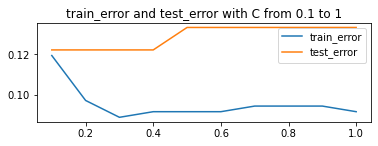

In [3]:
#########################
##      QUESTION 2     ##
#########################


def write_data_nonlinear(train_error0, test_error0, clf0,
                         train_error1, test_error1, clf1,
                         train_error2, test_error2, clf2, file):
    train_error = (train_error0 + train_error1 + train_error2)/3
    test_error = (test_error0 + test_error1 + test_error2)/3
    file.write(str(train_error)+"\n")
    file.write(str(test_error)+"\n")

    str_b0 = str(clf0.intercept_[0])
    str_support0 = ",".join(str(i) for i in clf0.support_)
    file.write(str_b0+"\n")
    file.write(str_support0+"\n")

    str_b1 = str(clf1.intercept_[0])
    str_support1 = ",".join(str(i) for i in clf1.support_)
    file.write(str_b1+"\n")
    file.write(str_support1+"\n")

    str_b2 = str(clf2.intercept_[0])
    str_support2 = ",".join(str(i) for i in clf2.support_)
    file.write(str_b2+"\n")
    file.write(str_support2+"\n")

    file.close()


# SVM_slack_${value of C}.txt
table_x = []
table_train = []
table_test = []

for i in range(10):
    C = 0.1 * (i+1)
    train_error0, test_error0, clf0 = SVM_model.SVM_slack(C, 0)
    train_error1, test_error1, clf1 = SVM_model.SVM_slack(C, 1)
    train_error2, test_error2, clf2 = SVM_model.SVM_slack(C, 2)

    table_x.append(C)
    table_train.append((train_error0+train_error1+train_error2)/3)
    table_test.append((test_error0+test_error1+test_error2)/3)

    if i == 9:
        file = open("SVM_slack_1.txt", "w")
    else:
        file = open(f"SVM_slack_0.{i+1}.txt", "w")
    write_data_linear(train_error0, test_error0, clf0,
                      train_error1, test_error1, clf1,
                      train_error2, test_error2, clf2, file)

plt.subplot(2, 1, 1)
plt.title("train_error and test_error with C from 0.1 to 1")
plt.plot(table_x, table_train)
plt.plot(table_x, table_test)
plt.legend(["train_error", "test_error"])
plt.show()

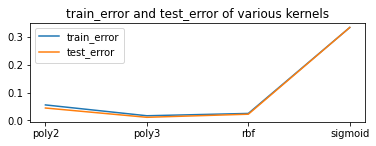

In [4]:
#########################
##      QUESTION 3     ##
#########################


table_x = ['poly2', 'poly3', 'rbf', 'sigmoid']
table_train = []
table_test = []

# SVM_poly2.txt
train_error0, test_error0, clf0 = SVM_model.SVM_kernel_poly2(1, 0)
train_error1, test_error1, clf1 = SVM_model.SVM_kernel_poly2(1, 1)
train_error2, test_error2, clf2 = SVM_model.SVM_kernel_poly2(1, 2)
table_train.append((train_error0+train_error1+train_error2)/3)
table_test.append((test_error0+test_error1+test_error2)/3)
file = open("SVM_poly2.txt", "w")
write_data_nonlinear(train_error0, test_error0, clf0,
                     train_error1, test_error1, clf1,
                     train_error2, test_error2, clf2, file)

# SVM_poly3.txt
train_error0, test_error0, clf0 = SVM_model.SVM_kernel_poly3(1, 0)
train_error1, test_error1, clf1 = SVM_model.SVM_kernel_poly3(1, 1)
train_error2, test_error2, clf2 = SVM_model.SVM_kernel_poly3(1, 2)
file = open("SVM_poly3.txt", "w")
table_train.append((train_error0+train_error1+train_error2)/3)
table_test.append((test_error0+test_error1+test_error2)/3)
write_data_nonlinear(train_error0, test_error0, clf0,
                     train_error1, test_error1, clf1,
                     train_error2, test_error2, clf2, file)

# SVM_rbf.txt
train_error0, test_error0, clf0 = SVM_model.SVM_kernel_rbf(1, 0)
train_error1, test_error1, clf1 = SVM_model.SVM_kernel_rbf(1, 1)
train_error2, test_error2, clf2 = SVM_model.SVM_kernel_rbf(1, 2)
table_train.append((train_error0+train_error1+train_error2)/3)
table_test.append((test_error0+test_error1+test_error2)/3)
file = open("SVM_rbf.txt", "w")
write_data_nonlinear(train_error0, test_error0, clf0,
                     train_error1, test_error1, clf1,
                     train_error2, test_error2, clf2, file)

# SVM_sigmoid.txt
train_error0, test_error0, clf0 = SVM_model.SVM_kernel_sigmoid(1, 0)
train_error1, test_error1, clf1 = SVM_model.SVM_kernel_sigmoid(1, 1)
train_error2, test_error2, clf2 = SVM_model.SVM_kernel_sigmoid(1, 2)
table_train.append((train_error0+train_error1+train_error2)/3)
table_test.append((test_error0+test_error1+test_error2)/3)
file = open("SVM_sigmoid.txt", "w")
write_data_nonlinear(train_error0, test_error0, clf0,
                     train_error1, test_error1, clf1,
                     train_error2, test_error2, clf2, file)

plt.subplot(2, 1, 2)
plt.title("train_error and test_error of various kernels")
plt.plot(table_x, table_train)
plt.plot(table_x, table_test)
plt.legend(["train_error", "test_error"])
plt.show()